In [1]:
import pandas as pd
df = pd.read_csv('CH_DT_train.csv')

In [2]:
df.head()

,State,Zip,Zip3,Weeks Since First Purchase,Weeks Since Last Purchase,Book Purchase ($),Nonbook Purchase($),Total Purchase ($),No. of Purchases,No. of Childbook Purchases,No. of Youthbook Purchases,No. of Cookbook Purchases,No. of Do It Purchases,No. of Referncebook Purchases,No. of Artbook Purchases,No. of Geographybook Purchases,Response,Unnamed: 17
0,NY,11365,113,49,1,141,335,476,12,2,0,4,1,1,0,4,Yes,Chosen
1,PA,19530,195,63,1,131,345,476,12,3,2,3,0,2,0,2,No,Chosen
2,MD,20769,207,39,1,146,329,475,12,1,1,2,0,2,1,5,Yes,Chosen
3,NY,11787,117,65,1,131,337,468,12,2,2,4,1,0,1,2,No,Chosen
4,PA,19446,194,57,1,136,324,460,12,3,1,5,0,0,1,2,No,Chosen


In [3]:
df.columns.values

array(['State', 'Zip', 'Zip3', 'Weeks Since First Purchase',
       'Weeks Since Last Purchase', 'Book Purchase ($)',
       'Nonbook Purchase($)', 'Total Purchase ($)', 'No. of Purchases',
       'No. of Childbook Purchases', 'No. of Youthbook Purchases',
       'No. of Cookbook Purchases', 'No. of Do It Purchases',
       'No. of Referncebook Purchases', 'No. of Artbook Purchases',
       'No. of Geographybook Purchases', 'Response', 'Unnamed: 17'],
      dtype=object)

In [4]:
# Dropping columns from the data frame that we won't need for our analysis
newdf = df.drop(columns= ['Unnamed: 17', 'State', 'Zip', 'Zip3'])

In [5]:
newdf.head()

,Weeks Since First Purchase,Weeks Since Last Purchase,Book Purchase ($),Nonbook Purchase($),Total Purchase ($),No. of Purchases,No. of Childbook Purchases,No. of Youthbook Purchases,No. of Cookbook Purchases,No. of Do It Purchases,No. of Referncebook Purchases,No. of Artbook Purchases,No. of Geographybook Purchases,Response
0,49,1,141,335,476,12,2,0,4,1,1,0,4,Yes
1,63,1,131,345,476,12,3,2,3,0,2,0,2,No
2,39,1,146,329,475,12,1,1,2,0,2,1,5,Yes
3,65,1,131,337,468,12,2,2,4,1,0,1,2,No
4,57,1,136,324,460,12,3,1,5,0,0,1,2,No


In [6]:
X = newdf.drop(['Response'], axis=1)
y = newdf.Response

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=69)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier()

In [10]:
model = dt.fit(X_train, y_train)

In [11]:
import matplotlib.pyplot as plt
import scikitplot as skplt

<AxesSubplot:title={'center':'DT Learning Curve'}, xlabel='Training examples', ylabel='Score'>

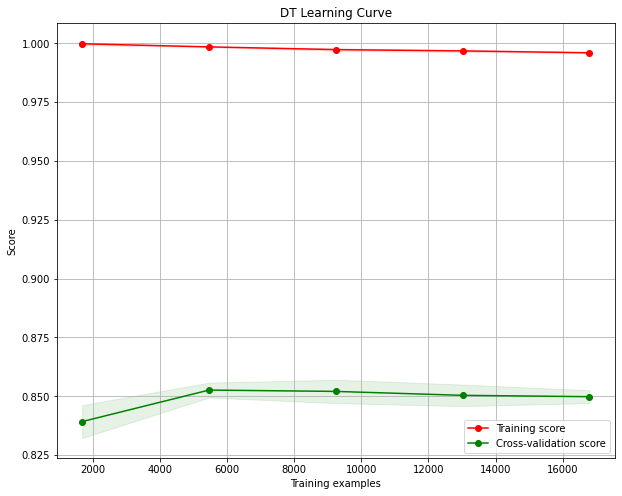

In [12]:
skplt.estimators.plot_learning_curve(dt, X_train, y_train, title='DT Learning Curve', cv=5, figsize=(10,8))

[Text(1192.3065000000001, 1716.2228571428573, 'X[11] <= 0.5\nentropy = 0.442\nsamples = 21000\nvalue = [19072, 1928]'),
 Text(604.5930000000001, 1452.1885714285715, 'X[1] <= 10.0\nentropy = 0.281\nsamples = 14744\nvalue = [14025, 719]'),
 Text(331.45200000000006, 1188.1542857142858, 'X[12] <= 0.5\nentropy = 0.385\nsamples = 6221\nvalue = [5753, 468]'),
 Text(184.14000000000001, 924.12, 'X[0] <= 12.0\nentropy = 0.328\nsamples = 4165\nvalue = [3915, 250]'),
 Text(98.20800000000001, 660.0857142857142, 'X[1] <= 2.0\nentropy = 0.363\nsamples = 3096\nvalue = [2882, 214]'),
 Text(49.104000000000006, 396.05142857142846, 'X[4] <= 308.5\nentropy = 0.454\nsamples = 609\nvalue = [551, 58]'),
 Text(24.552000000000003, 132.01714285714274, 'entropy = 0.467\nsamples = 583\nvalue = [525, 58]'),
 Text(73.656, 132.01714285714274, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(147.312, 396.05142857142846, 'X[3] <= 294.5\nentropy = 0.338\nsamples = 2487\nvalue = [2331, 156]'),
 Text(122.76000000000

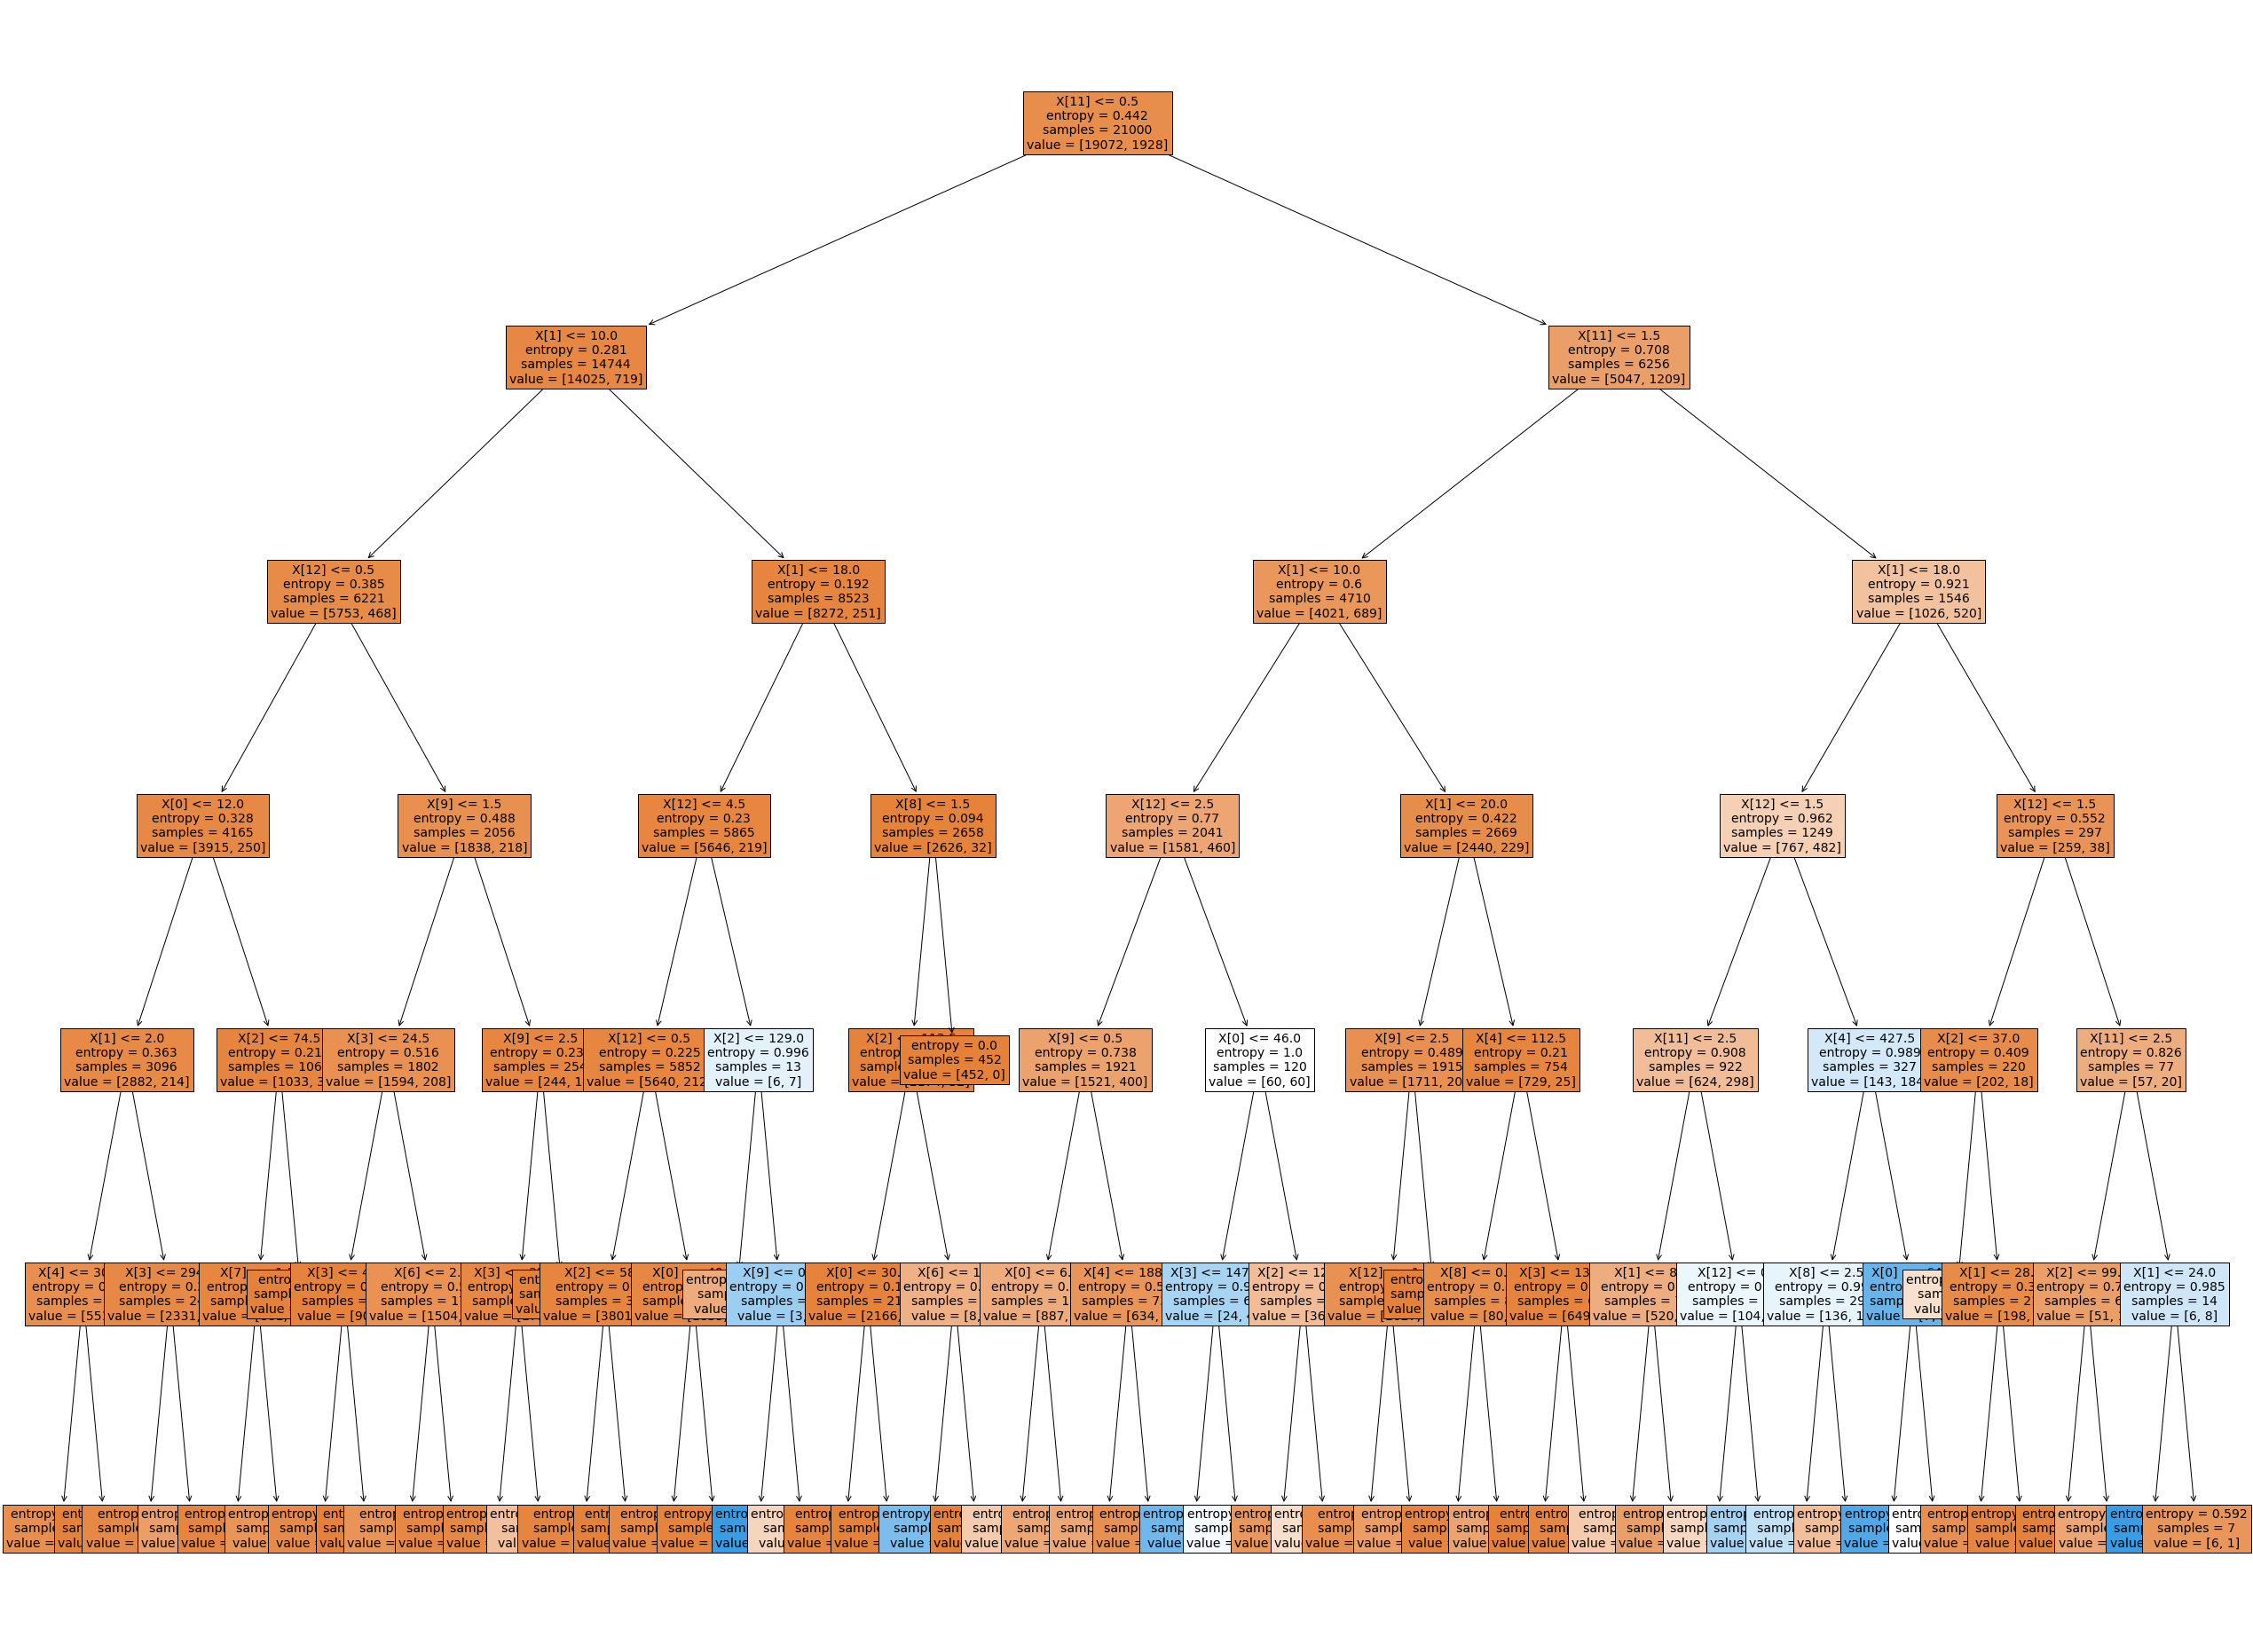

In [40]:
from sklearn import tree

%matplotlib inline
plt.figure(figsize=(44,34))
tree.plot_tree(dt, filled=True, fontsize=14)

In [14]:
predicted = model.predict(X_test)

print('Accuracy is:', metrics.accuracy_score(y_test, predicted))

Accuracy is: 0.8563333333333333


In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))

[[7517  689]
 [ 604  190]]


In [18]:
print('Sensitivity is:', (7517)/(7517+608))
print('Specificity is:', (186)/(186+689))
print('Precision is:', (7517)/(7517+689))

Sensitivity is: 0.9251692307692307
Specificity is: 0.21257142857142858
Precision is: 0.9160370460638557


In [19]:
predicted_probas = model.predict_proba(X_test)

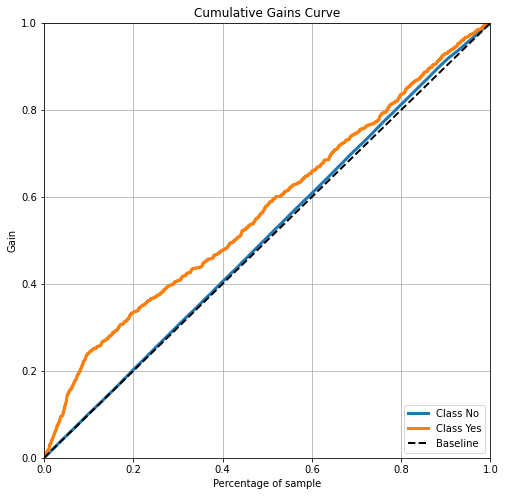

In [20]:
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8,8))
plt.show()

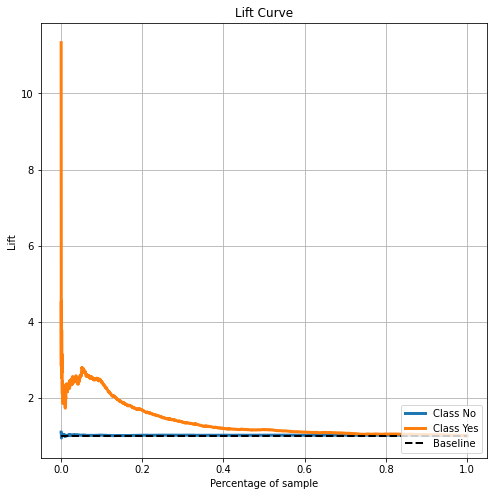

In [21]:
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=predicted_probas, figsize=(8,8))
plt.show()

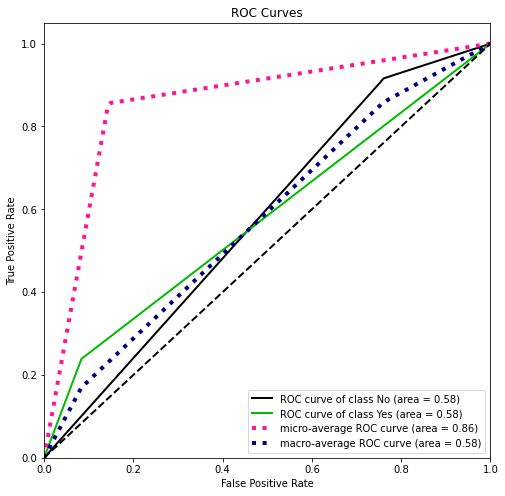

In [22]:
skplt.metrics.plot_roc(y_true=y_test, y_probas=predicted_probas, figsize=(8,8))
plt.show()

Text(0.5, 0, 'Decision Tree Feature Importance')

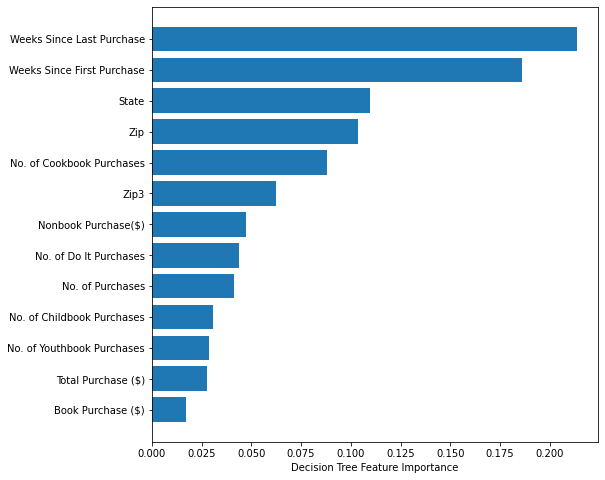

In [23]:
sorted_idx = dt.feature_importances_.argsort()
fig, ax1 = plt.subplots(1, figsize=(8,8))
plt.barh(df.columns.values[sorted_idx], dt.feature_importances_[sorted_idx])
plt.xlabel('Decision Tree Feature Importance')

In [24]:
from pprint import pprint

print('Parameters currently in use: \n')
pprint(dt.get_params())

Parameters currently in use: 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 6, 8, 10, 12],
    "min_samples_leaf": [3, 4, 5],
    "min_samples_split": [8, 10, 12]
}

In [26]:
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid,
                          cv = 2, n_jobs = -1, verbose = 2)



In [27]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.8s finished


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=2)

In [28]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [29]:
dt = DecisionTreeClassifier(**grid_search.best_params_)
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)

In [30]:
predicted = dt.predict(X_test)

print('Accuracy is:', metrics.accuracy_score(y_test, predicted))

Accuracy is: 0.9163333333333333


In [31]:
predicted_probas = dt.predict_proba(X_test)

<AxesSubplot:title={'center':'Cumulative Gains Curve for Best Grid Search'}, xlabel='Percentage of sample', ylabel='Gain'>

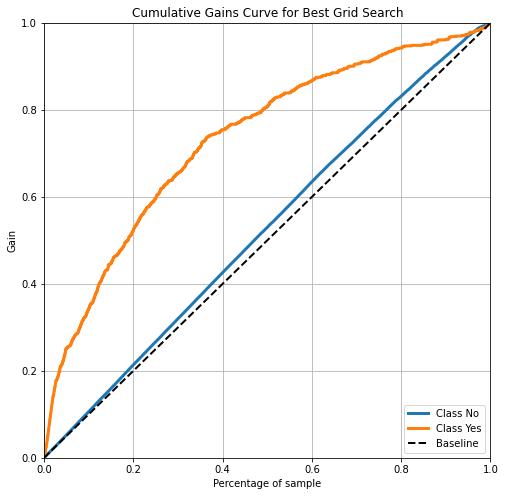

In [32]:
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8,8), title='Cumulative Gains Curve for Best Grid Search')

<AxesSubplot:title={'center':'ROC Curve for Best Gride Search'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

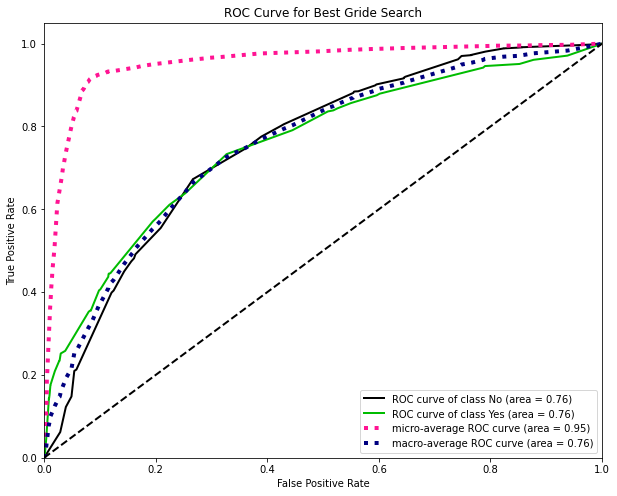

In [33]:
skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(10,8), title='ROC Curve for Best Gride Search')